In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
var = "err"
noise = "0_01"
sub = 10

In [104]:
Time_ESS_FOM = np.load(f'../data/recorded_values/MDA_MF_FOM_noise_{noise}_{var}_sub{1}_scaling0_01.npy')

# Time_ESS_MFDA1_1 = np.load(f'../data/recorded_values/MDA_MF_MFDA1_noise_{noise}_{var}_sub{1}_scaling0_001.npy')
# Time_ESS_MLDA1_1 = np.load(f'../data/recorded_values/MDA_MF_MLDA1_noise_{noise}_{var}_sub{1}_scaling0_001.npy')
# Time_ESS_MLDA2_1 = np.load(f'../data/recorded_values/MDA_MF_MLDA2_noise_{noise}_{var}_sub{1}_scaling0_001.npy')
# Time_ESS_MFDA2_1 = np.load(f'../data/recorded_values/MDA_MF_MFDA2_noise_{noise}_{var}_sub{1}_scaling0_001.npy')

# Time_ESS_MFDA1_2 = np.load(f'../data/recorded_values/MDA_MF_MFDA1_noise_{noise}_{var}_sub{2}_scaling0_001.npy')
# Time_ESS_MLDA1_2 = np.load(f'../data/recorded_values/MDA_MF_MLDA1_noise_{noise}_{var}_sub{2}_scaling0_001.npy')
# Time_ESS_MLDA2_2 = np.load(f'../data/recorded_values/MDA_MF_MLDA2_noise_{noise}_{var}_sub{2}_scaling0_001.npy')
# Time_ESS_MFDA2_2 = np.load(f'../data/recorded_values/MDA_MF_MFDA2_noise_{noise}_{var}_sub{2}_scaling0_001.npy')

# Time_ESS_MFDA1_3 = np.load(f'../data/recorded_values/MDA_MF_MFDA1_noise_{noise}_{var}_sub{5}_scaling0_001.npy')
# Time_ESS_MLDA1_3 = np.load(f'../data/recorded_values/MDA_MF_MLDA1_noise_{noise}_{var}_sub{5}_scaling0_001.npy')
# Time_ESS_MLDA2_3 = np.load(f'../data/recorded_values/MDA_MF_MLDA2_noise_{noise}_{var}_sub{5}_scaling0_001.npy')
# Time_ESS_MFDA2_3 = np.load(f'../data/recorded_values/MDA_MF_MFDA2_noise_{noise}_{var}_sub{5}_scaling0_001.npy')

Time_ESS_MFDA1_4 = np.load(f'../data/recorded_values/MDA_MF_MFDA1_noise_{noise}_{var}_sub{10}_scaling0_01.npy')
Time_ESS_MLDA1_4 = np.load(f'../data/recorded_values/MDA_MF_MLDA1_noise_{noise}_{var}_sub{10}_scaling0_01.npy')
Time_ESS_MLDA2_4 = np.load(f'../data/recorded_values/MDA_MF_MLDA2_noise_{noise}_{var}_sub{10}_scaling0_01.npy')
Time_ESS_MFDA2_4 = np.load(f'../data/recorded_values/MDA_MF_MFDA2_noise_{noise}_{var}_sub{10}_scaling0_01.npy')

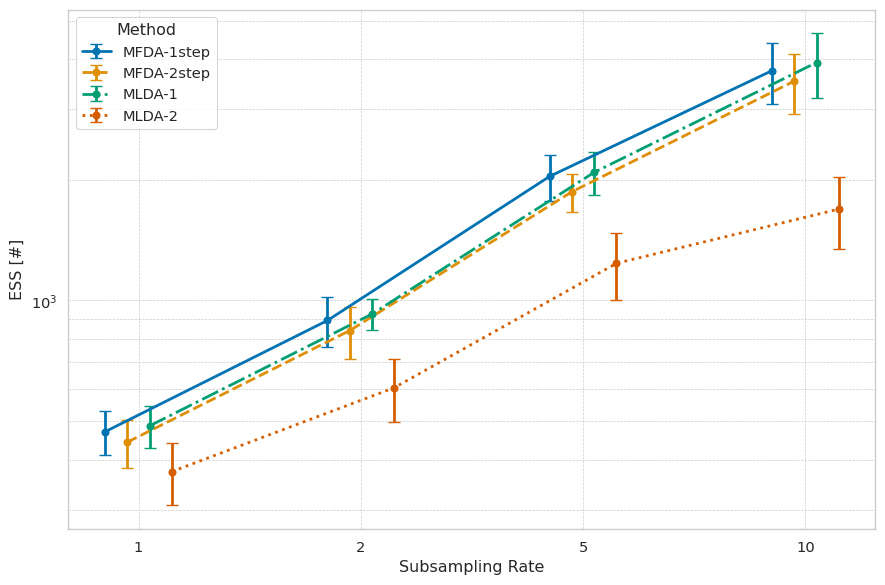

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Parameters
noise = "0_01"
var = "ESS"
subsampling_rates = [1, 2, 5, 10]
methods = ['MFDA1', 'MFDA2', 'MLDA1', 'MLDA2']
labels = ['MFDA-1step', 'MFDA-2step', 'MLDA-1', 'MLDA-2']
line_styles = ['-', '--', '-.', ':']  # One per method
palette = sns.color_palette("colorblind")

# Load MF methods
records = []
for sub in subsampling_rates:
    for method in methods:
        filename = f'../data/recorded_values/MDA_MF_{method}_noise_{noise}_{var}_sub{sub}_scaling0_01.npy'
        if os.path.exists(filename):
            ess_values = np.load(filename)
            for val in ess_values:
                records.append({'Method': method, 'Subsampling': sub, 'ESS': val})
        else:
            print(f'⚠️ File not found: {filename}')

# Load FOM benchmark
fom_ess = []
fom_filename = f'../data/recorded_values/MDA_MF_FOM_noise_{noise}_{var}_sub1_scaling0_01.npy'
if os.path.exists(fom_filename):
    fom_ess = np.load(fom_filename)
    fom_mean = np.mean(fom_ess)
    fom_std = np.std(fom_ess)
else:
    print(f'⚠️ FOM file not found: {fom_filename}')
    fom_mean = None

# Create DataFrame
df = pd.DataFrame(records)

# Only proceed if data is present
if not df.empty and fom_mean is not None:
    summary_df = df.groupby(['Subsampling', 'Method']).agg(
        mean_ess=('ESS', 'mean'),
        std_ess=('ESS', 'std')
    ).reset_index()

    # Plot settings
    sns.set(style="whitegrid", context="paper", font_scale=1.2)
    plt.figure(figsize=(9, 6))
    ax = plt.gca()

    # X-axis and offsets
    x_positions = np.arange(len(subsampling_rates))
    offset = 0.15
    total_methods = len(methods)
    shifts = np.linspace(-offset, offset, total_methods)

    # Plot method lines
    for i, (method, color, style, label) in enumerate(zip(methods, palette, line_styles, labels)):
        method_data = summary_df[summary_df['Method'] == method]
        x_vals = x_positions + shifts[i]
        y_vals = method_data['mean_ess'].values
        y_errs = method_data['std_ess'].values

        ax.errorbar(
            x_vals, y_vals, yerr=y_errs,
            label=label,
            marker='o',
            linestyle=style,
            linewidth=2,
            capsize=4,
            color=color
        )

    # # Add FOM line across full x range
    # ax.hlines(fom_mean, x_positions[0] - 0.1, x_positions[-1] + 0.1,
    #           color='black', linestyle='--', linewidth=2, label='FOM (benchmark)')

    # Axis formatting
    ax.set_xticks(x_positions)
    ax.set_xticklabels(subsampling_rates)
    ax.set_xlabel('Subsampling Rate')
    ax.set_ylabel('ESS [#]')
    ax.set_yscale('log')
    # ax.set_title('Mean ESS with Standard Deviation Across Methods')
    ax.legend(title='Method')
    ax.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(f'../figures/ESS_01.pdf', bbox_inches='tight')
    plt.show()

else:
    print("No sufficient data to plot.")

In [106]:
ess_fom = Time_ESS_FOM
ess_mfda1 = Time_ESS_MFDA1_4
ess_mlda1 = Time_ESS_MLDA1_4
ess_mlda2 = Time_ESS_MLDA2_4
ess_mfda2 = Time_ESS_MFDA2_4

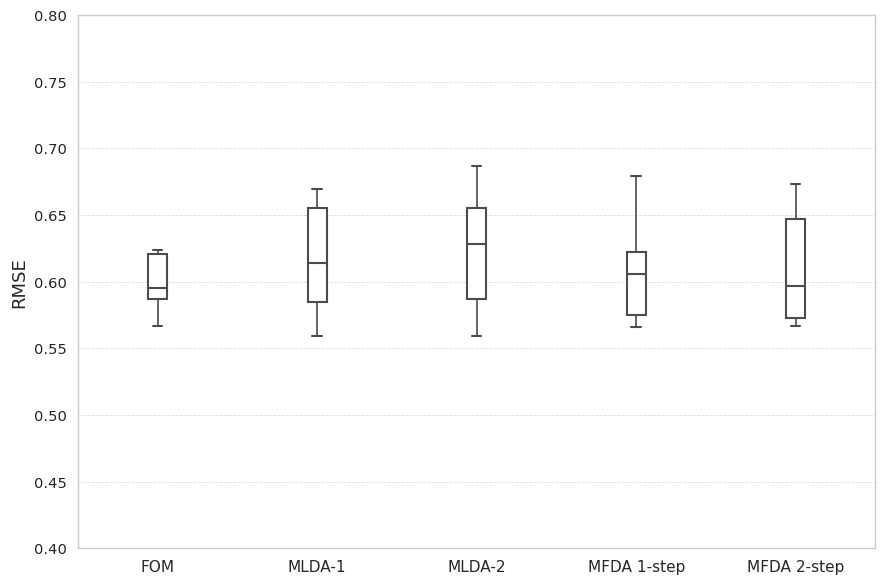

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input
labels = ['FOM', 'MLDA-1', 'MLDA-2', 'MFDA 1-step', 'MFDA 2-step']
data = [ess_fom, ess_mlda1, ess_mlda2, ess_mfda1, ess_mfda2]

# Trim extreme values
def trim_and_log(x, trim=1):
    x_sorted = np.sort(x)
    return x_sorted[trim:-trim]

filtered_data1 = [trim_and_log(d, trim=1) for d in data]
filtered_data2 = [trim_and_log(d, trim=1) for d in data]

# Seaborn style
sns.set(style='whitegrid', context='paper', font_scale=1.2)
palette = sns.color_palette("colorblind")

# Create plot
plt.figure(figsize=(9, 6))

# Violin plot (distribution)
# sns.violinplot(
#     data=filtered_data1,
#     inner=None,
#     linewidth=0.7,
#     palette=palette,
#     bw=0.5,
#     cut=0
# )

# Boxplot overlay (central tendency and spread)
sns.boxplot(
    data=filtered_data2,
    width=0.12,
    color='white',
    linewidth=1.5,
    showcaps=True,
    boxprops={'zorder': 2},
    showfliers=False,
    whiskerprops={'linewidth': 1.2},
    zorder=2
)

# Formatting
# plt.yscale('log')

plt.ylabel('RMSE', fontsize=13)
plt.xticks(ticks=range(len(labels)), labels=labels, fontsize=11)
plt.ylim(0.4,0.8)
# plt.title('Sampling Efficiency Comparison', fontsize=14, weight='bold')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)

plt.tight_layout()
plt.savefig(f'../figures/err_01.pdf', bbox_inches='tight')
plt.show()